In [1]:
!rm -rf Fashion_Segmentation
!git clone https://github.com/PARKYUNSU/Fashion_Segmentation

!pip install numpy==1.24.4 scipy==1.13.3 --no-cache-dir --force-reinstall

!pip install carvekit

!pip install tensorboardX av torchgeometry iglovikov_helper_functions albumentations

%cd Fashion_Segmentation

!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

Cloning into 'Fashion_Segmentation'...
remote: Enumerating objects: 1301, done.
remote: Counting objects: 100% (1253/1253), done.
remote: Compressing objects: 100% (973/973), done.
remote: Total 1301 (delta 290), reused 1214 (delta 254), pack-reused 48 (from 1)
Receiving objects: 100% (1301/1301), 123.62 MiB | 19.79 MiB/s, done.
Resolving deltas: 100% (292/292), done.


Exception in thread Thread-5 (attachment_entry):
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/debugpy/server/api.py", line 237, in listen
    sock, _ = endpoints_listener.accept()
  File "/usr/lib/python3.10/socket.py", line 293, in accept
    fd, addr = self._accept()
TimeoutError: timed out

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/google/colab/_debugpy.py", line 52, in attachment_entry
    debugpy.listen(_dap_port)
  File "/usr/local/lib/python3.10/dist-packages/debugpy/public_api.py", line 31, in wrapper
    return wrapped(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/debugpy/server/api.py", line 143, in debug
    log.reraise

ERROR: Ignored the following yanked versions: 1.11.0, 1.14.0rc1
ERROR: Ignored the following versions that require a different python version: 1.6.2 Requires-Python >=3.7,<3.10; 1.6.3 Requires-Python >=3.7,<3.10; 1.7.0 Requires-Python >=3.7,<3.10; 1.7.1 Requires-Python >=3.7,<3.10
ERROR: Could not find a version that satisfies the requirement scipy==1.13.3 (from versions: 0.8.0, 0.9.0, 0.10.0, 0.10.1, 0.11.0, 0.12.0, 0.12.1, 0.13.0, 0.13.1, 0.13.2, 0.13.3, 0.14.0, 0.14.1, 0.15.0, 0.15.1, 0.16.0, 0.16.1, 0.17.0, 0.17.1, 0.18.0, 0.18.1, 0.19.0, 0.19.1, 1.0.0, 1.0.1, 1.1.0, 1.2.0, 1.2.1, 1.2.2, 1.2.3, 1.3.0, 1.3.1, 1.3.2, 1.3.3, 1.4.0, 1.4.1, 1.5.0, 1.5.1, 1.5.2, 1.5.3, 1.5.4, 1.6.0, 1.6.1, 1.7.2, 1.7.3, 1.8.0rc1, 1.8.0rc2, 1.8.0rc3, 1.8.0rc4, 1.8.0, 1.8.1, 1.9.0rc1, 1.9.0rc2, 1.9.0rc3, 1.9.0, 1.9.1, 1.9.2, 1.9.3, 1.10.0rc1, 1.10.0rc2, 1.10.0, 1.10.1, 1.11.0rc1, 1.11.0rc2, 1.11.1, 1.11.2, 1.11.3, 1.11.4, 1.12.0rc1, 1.12.0rc2, 1.12.0, 1.13.0rc1, 1.13.0, 1.13.1, 1.14.0rc2, 1.14.0, 1.14.1)
E

In [2]:
%cd model
!gdown https://drive.google.com/uc?id=1pLWJdMJgIqq5_C0RK6TXbQXTNRrO71-B
!gdown https://drive.google.com/uc?id=1fmPsx__jHKy-quvFZA2ICN1YDB7xoo4u
%cd ../

/content/Fashion_Segmentation/model
Downloading...
From (original): https://drive.google.com/uc?id=1pLWJdMJgIqq5_C0RK6TXbQXTNRrO71-B
From (redirected): https://drive.google.com/uc?id=1pLWJdMJgIqq5_C0RK6TXbQXTNRrO71-B&confirm=t&uuid=df584ca4-cc19-4fc6-903a-cf92d7fb101e
To: /content/Fashion_Segmentation/model/pose_iter_584000.caffemodel.pt
100% 105M/105M [00:02<00:00, 35.9MB/s] 
Downloading...
From (original): https://drive.google.com/uc?id=1fmPsx__jHKy-quvFZA2ICN1YDB7xoo4u
From (redirected): https://drive.google.com/uc?id=1fmPsx__jHKy-quvFZA2ICN1YDB7xoo4u&confirm=t&uuid=2d225d87-3593-487a-bd2a-95d28fd247e1
To: /content/Fashion_Segmentation/model/hand_pose_model.pth
100% 147M/147M [00:01<00:00, 93.2MB/s]
/content/Fashion_Segmentation


In [3]:
!pip install --upgrade --no-cache-dir gdown

%cd HR-VITON-main
!gdown https://drive.google.com/u/0/uc?id=1T5_YDUhYSSKPC_nZMk2NeC-XXUFoYeNy&export=download
!gdown https://drive.google.com/u/0/uc?id=1XJTCdRBOPVgVTmqzhVGFAgMm2NLkw5uQ&export=download
%cd ../

%cd Graphonomy-master
!gdown https://drive.google.com/u/0/uc?id=1eUe18HoH05p0yFUd_sN6GXdTj82aW0m9&export=download
%cd ../

/content/Fashion_Segmentation/HR-VITON-main
Downloading...
From (original): https://drive.google.com/u/0/uc?id=1T5_YDUhYSSKPC_nZMk2NeC-XXUFoYeNy
From (redirected): https://drive.google.com/uc?id=1T5_YDUhYSSKPC_nZMk2NeC-XXUFoYeNy&confirm=t&uuid=35d718c3-f05d-4735-b523-034b3c4c4833
To: /content/Fashion_Segmentation/HR-VITON-main/gen.pth
100% 402M/402M [00:02<00:00, 141MB/s]
Downloading...
From (original): https://drive.google.com/u/0/uc?id=1XJTCdRBOPVgVTmqzhVGFAgMm2NLkw5uQ
From (redirected): https://drive.google.com/uc?id=1XJTCdRBOPVgVTmqzhVGFAgMm2NLkw5uQ&confirm=t&uuid=0da4a16d-0bae-4f84-aac9-fb1ae061e90a
To: /content/Fashion_Segmentation/HR-VITON-main/mtviton.pth
100% 190M/190M [00:01<00:00, 118MB/s]
/content/Fashion_Segmentation
/content/Fashion_Segmentation/Graphonomy-master
Downloading...
From (original): https://drive.google.com/u/0/uc?id=1eUe18HoH05p0yFUd_sN6GXdTj82aW0m9
From (redirected): https://drive.google.com/uc?id=1eUe18HoH05p0yFUd_sN6GXdTj82aW0m9&confirm=t&uuid=9af29311-bbf

In [4]:
ls

 clothseg.py          grayscale.py     openpose.py
 detectron2/          HR-VITON-main/  'Preprocessing(1)(2)(5)_final (1).ipynb'
 get_agnostic.py      input/          'Preprocessing(3)(4)(6)_final (1).ipynb'
 get_densepose.py*    main.py          README.md
 Graphonomy-master/   model/           src/


# Cloth
입히고자 원하는 옷 이미지를 업로드 하십시오!

In [5]:
import os
import shutil
from google.colab import files

input_dir = 'input'
uploaded = files.upload()
for filename in uploaded.keys():
  input_path = os.path.join(input_dir, filename)
  shutil.move(filename, input_path)
os.rename(input_path, input_dir+'/cloth.jpg')

Saving 00001_00.jpg to 00001_00.jpg


# 모델
원하는 인물 및 원하는 모델의 이미지를 업로드 하십시오!

In [6]:
input_dir = 'input'
uploaded = files.upload()
for filename in uploaded.keys():
  input_path = os.path.join(input_dir, filename)
  shutil.move(filename, input_path)
os.rename(input_path, input_dir+'/model.jpg')

Saving 00001_00.jpg to 00001_00.jpg


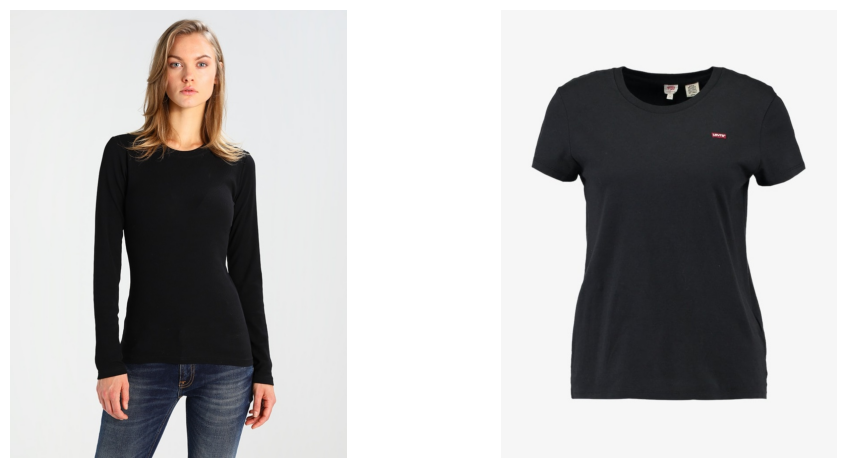

In [7]:
import matplotlib.pyplot as plt
import cv2

mode = cv2.cvtColor(cv2.imread("./input/model.jpg"), cv2.COLOR_BGR2RGB)
cloth = cv2.cvtColor(cv2.imread("./input/cloth.jpg"), cv2.COLOR_BGR2RGB)
## Display Images
fig, axes = plt.subplots(nrows=1, ncols=2)
dpi = fig.get_dpi()
fig.set_size_inches(900/ dpi, 448 / dpi)
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
axes[0].axis('off')
axes[0].imshow(mode)
axes[1].axis('off')
axes[1].imshow(cloth)
plt.show()

In [8]:
ls

 clothseg.py          grayscale.py     openpose.py
 detectron2/          HR-VITON-main/  'Preprocessing(1)(2)(5)_final (1).ipynb'
 get_agnostic.py      input/          'Preprocessing(3)(4)(6)_final (1).ipynb'
 get_densepose.py*    main.py          README.md
 Graphonomy-master/   model/           src/


In [9]:
!python main.py #--background False

Get mask of cloth

/usr/local/lib/python3.10/dist-packages/carvekit/ml/wrap/u2net.py:55: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(u2net_full_pretrained(), ma

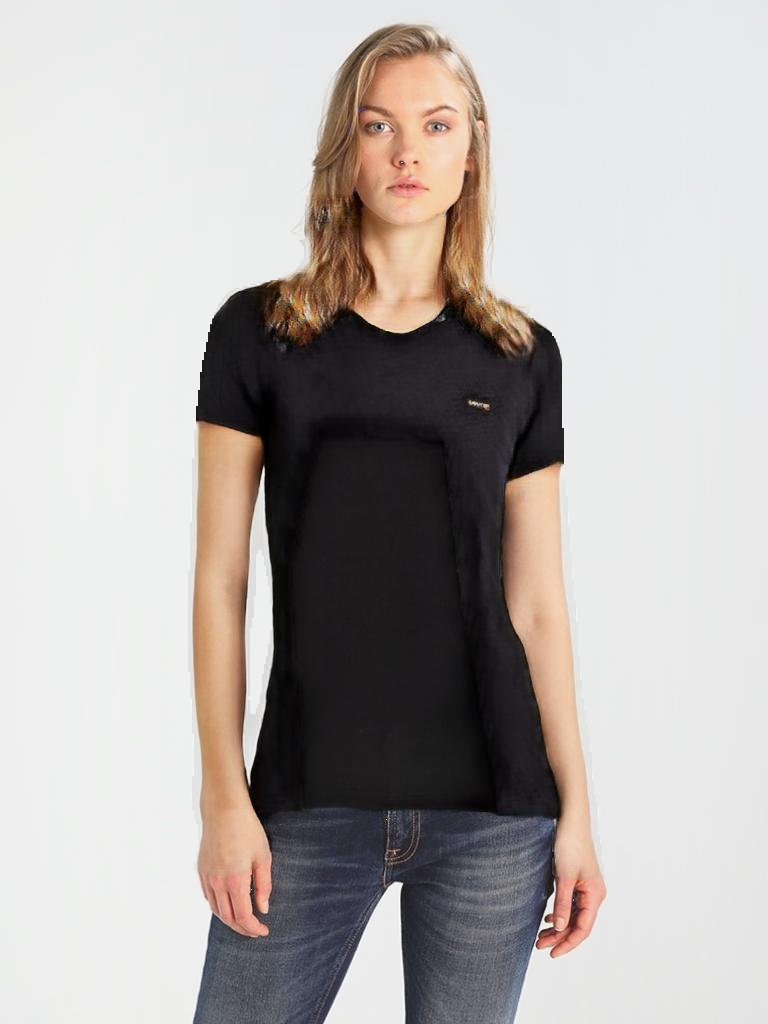

In [10]:
from PIL import Image
from IPython.display import Image

image1 = Image(filename="./input/finalimg.png")
display(image1)